In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('00690.csv')
data.set_index(pd.to_datetime(data['Date'],format='%Y/%m/%d'),inplace=True)
data.drop('Date',axis=1,inplace=True)
data.head()

,Price
Date,
2017-03-31,19.91
2017-04-05,19.95
2017-04-06,19.93
2017-04-07,19.84
2017-04-10,19.80


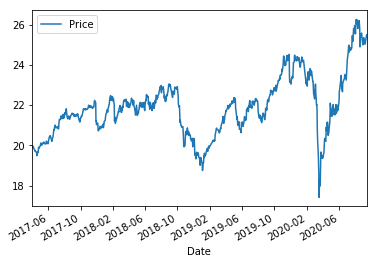

In [3]:
data.plot()

In [4]:
PMT=3000
start='2017-3-31'
end='2020-8-31'

In [5]:
df=data.copy()
dfm=df.resample('BM').last()
dfm=dfm.loc[start:end]
dfm.head()

,Price
Date,
2017-03-31,19.91
2017-04-28,19.87
2017-05-31,20.08
2017-06-30,20.87
2017-07-31,21.37


In [6]:
TC_list=[]
for i in range(1,len(dfm)+1):
    TC=PMT*i
    TC_list.append(TC)
dfm['total_cost']=TC_list

dfm.head()

,Price,total_cost
Date,,
2017-03-31,19.91,3000
2017-04-28,19.87,6000
2017-05-31,20.08,9000
2017-06-30,20.87,12000
2017-07-31,21.37,15000


In [7]:
unit_list=[PMT/dfm['Price'].iloc[0]]
for i in dfm['Price'].iloc[1:]:
    unit=unit_list[-1]+PMT/i
    unit_list.append(unit)
dfm['unit']=unit_list

dfm.head()

,Price,total_cost,unit
Date,,,
2017-03-31,19.91,3000,150.678051
2017-04-28,19.87,6000,301.659430
2017-05-31,20.08,9000,451.061821
2017-06-30,20.87,12000,594.808826
2017-07-31,21.37,15000,735.192541


In [8]:
preNAV_list=[0]
for i,j in enumerate(dfm['Price'].iloc[1:]):
    preNAV=dfm['unit'].iloc[i]*j
    preNAV_list.append(preNAV)
dfm['pre_NAV']=preNAV_list

dfm.head()

,Price,total_cost,unit,pre_NAV
Date,,,,
2017-03-31,19.91,3000,150.678051,0.000000
2017-04-28,19.87,6000,301.659430,2993.972878
2017-05-31,20.08,9000,451.061821,6057.321358
2017-06-30,20.87,12000,594.808826,9413.660197
2017-07-31,21.37,15000,735.192541,12711.064610


In [9]:
dfm['total_return(%)']=(dfm['pre_NAV']/(dfm['total_cost']-PMT)-1)*100
dfm.head()

C:\Users\tinah\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


,Price,total_cost,unit,pre_NAV,total_return(%)
Date,,,,,
2017-03-31,19.91,3000,150.678051,0.000000,NaN
2017-04-28,19.87,6000,301.659430,2993.972878,-0.200904
2017-05-31,20.08,9000,451.061821,6057.321358,0.955356
2017-06-30,20.87,12000,594.808826,9413.660197,4.596224
2017-07-31,21.37,15000,735.192541,12711.064610,5.925538


C:\Users\tinah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


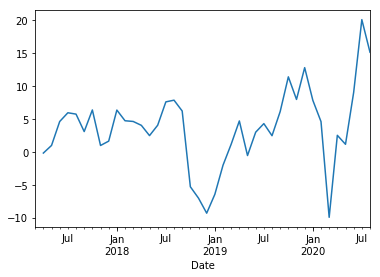

In [10]:
dfm['total_return(%)'].to_csv('SIP_00690.csv')
dfm['total_return(%)'].plot()

C:\Users\tinah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


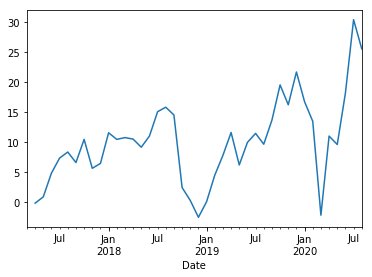

In [11]:
lr=np.log(dfm['Price']).diff(1)
tr=np.exp(np.cumsum(lr))-1
tr=tr*100
tr.to_csv('TR_00690.csv')
tr.plot()

In [12]:
print(dfm['total_return(%)'].iloc[-1])
print(tr.iloc[-1])

15.126906281585327
25.56504269211448
